## Analysis

In [ ]:
#create _describe.csv
import pandas as pd

folderinput = "../workdir/AIS-TrainedModel/"

filename = "aisdk-2023-11-08_1_knn_result_18000_10240"
folderoutput = f"../workdir/AIS-Images/{filename}/"

pd.set_option("display.float_format", lambda x: '%.1f' % x)

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


df_res_dis = [0]*4*3*10
i = 0

for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        for alg in ("bl", "lr", "ml", "as"):
            df_res_dis[i] = (df_res[f"{alg}_{known}w{noise}"].describe())
            i = i + 1



df_res_dis = str(df_res_dis)

df_res_dis = df_res_dis.replace("           ", ";")
df_res_dis = df_res_dis.replace("          ", ";")
df_res_dis = df_res_dis.replace("         ", ";")
df_res_dis = df_res_dis.replace("        ", ";")
df_res_dis = df_res_dis.replace("       ", ";")
df_res_dis = df_res_dis.replace("      ", ";")
df_res_dis = df_res_dis.replace("     ", ";")
df_res_dis = df_res_dis.replace("    ", ";")
df_res_dis = df_res_dis.replace("   ", ";")
df_res_dis = df_res_dis.replace("  ", ";")
df_res_dis = df_res_dis.replace("   ", ";")


## creating a new empty file or overwriting existend file
save_file = open(f"{folderoutput}{filename}_describe.csv", "w")
save_file.write(df_res_dis)
save_file.close()


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

## Visualisation

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/"

filename = "aisdk-2023-11-08_1_knn_result_18000_10240"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

df_res.head(4)

,known_3_0,noise_3_0,bl_3w0,lr_3w0,ml_3w0,as_3w0,bl_3w5,lr_3w5,ml_3w5,as_3w5,...,ml_12w0,as_12w0,bl_12w5,lr_12w5,ml_12w5,as_12w5,bl_12w10,lr_12w10,ml_12w10,as_12w10
0,3,0,57.5,10.1,0.8,2.2,61.8,17.5,8.3,12.4,...,0.7,10.1,9.8,10.5,11.1,10.4,2.3,17.9,17.3,30.8
1,3,0,43.8,41.7,6.7,6.5,43.5,40.0,5.2,6.2,...,2.1,10.4,8.2,14.1,7.8,3.3,17.6,10.8,5.2,13.9
2,3,0,13.6,1.7,1.6,0.9,14.1,2.4,1.6,1.1,...,4.6,8.6,24.8,6.5,5.3,5.8,45.4,19.5,28.6,19.5
3,3,0,55.7,35.0,9.1,5.5,54.8,36.7,15.9,15.9,...,4.8,12.9,37.6,2.7,10.1,2.2,38.8,19.2,21.0,25.9


C:\Users\Sese\AppData\Local\Temp\ipykernel_16816\53091439.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))
C:\Users\Sese\AppData\Local\Temp\ipykernel_16816\53091439.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))
C:\Users\Sese\AppData\Local\Temp\ipykernel_16816\53091439.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))
C:\Users\Sese\AppData\Local\Temp\ipykernel_16816\53091439.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an under

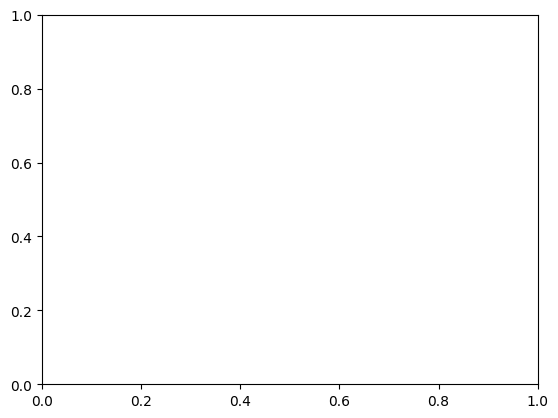

In [ ]:
#Boxplot A_A_X

import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# BL vs XX 3 bis 12 -> 3 Bilder
for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
#     for alg in ("lr", "nn", "as"):
        df_loc = df_res.copy()

        # df_loc = df_loc.filter(regex=f"bl|{alg}")
        df_loc = df_loc.filter(regex=f"_{known}w")
        df_loc = df_loc.filter(regex=f"w{noise}")
        df_loc = df_loc.filter(regex=f"bl|lr|ml|as")

        
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn"})

        df_loc.boxplot(showfliers=False, rot=90)
        
        plt.legend(bbox_to_anchor=(1.0, 1.0))
        plt.grid(linestyle = '--', linewidth = 0.5)
        plt.xlabel('Vorhersagemethode')
        plt.ylabel('Präzession in [m]')

        plt.show
        plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_X.png", bbox_inches='tight', dpi=600)
        df_loc = []
        plt.cla()

Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success


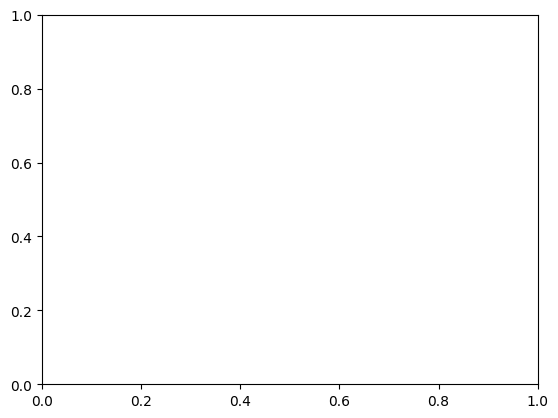

In [ ]:
#Box plot X_A_A
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml', 'lr', 'bl']:
        

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)


# BL vs XX 3 bis 12 -> 3 Bilder
for noise in range(0, 11, 5):
    for alg in ("bl", "lr", "ml", "as"):
        df_loc = df_res.copy()
        
        df_loc = df_loc.filter(regex=f"{alg}")
        df_loc = df_loc.filter(regex=f"w{noise}")

        plt.xlabel(f"Anzahl bekannter Positionen")

        for known in range(3, 13, 1):
            df_loc = df_loc.rename(columns={f"{alg}_{known}w{noise}": f"{known}"})

        df_loc.boxplot(showfliers=False, rot=90)
        plt.ylabel('Präzession in [m]')
        plt.grid(linestyle = '--', linewidth = 0.5)
        plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_{alg}.png", bbox_inches='tight', dpi=600)
        print('Saving Success')
        df_loc = []
        plt.cla()

In [3]:
#Box plot A_X_X Seaborn
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# sorting columns
known = 3
noise = 0
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
df_res = df_res.drop([f"known_{known}_{noise}"], axis=1)
df_res = df_res.drop([f"noise_{known}_{noise}"], axis=1)

known = 9
df_loc = df_res#.copy()
df_loc = df_loc.filter(regex=f"_{known}w")

for noise in range(0, 11, 5):
    # if (noise == 0):
    #     df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline ohne Rauschen"})
    #     df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression ohne Rauschen"})
    #     df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor ohne Rauschen"})
    #     df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn ohne Rauschen"})
    # else:
    df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline {noise} m Std. Abw. R."})
    df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression {noise} m Std. Abw. R."})
    df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor {noise} m Std. Abw. R."})
    df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn {noise} m Std. Abw. R."})

        

sns.set_style("whitegrid")
ax = sns.boxplot(df_loc, showfliers=False)
ax.set(ylabel=f'Präzision in [m]', xlabel='Vorhersagemethode')
plt.grid(linestyle = '--', linewidth = 0.5)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig(f"{folderoutput}{filename}_test_{known}_X_X_box_multi.png", bbox_inches='tight', dpi=600) 
ax = []
res_df = []
plt.clf()

<Figure size 640x480 with 0 Axes>

1

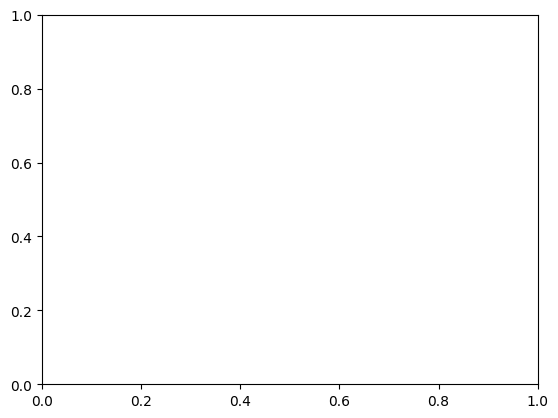

In [22]:
# Median X_A_X Errorbar
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# indeX = df_res.columns
indeX = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        for alg in ['as', 'ml', 'lr', 'bl']:
        # for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)


for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")
    


    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})
        df_loc[f" {known}"] = df_loc[f"Baseline_{known}_{noise}"] * 0 + 50
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0 - 10

    # df_tmp2 = df_loc[].copy()
    
    if noise == 0:
        markers = {'Baseline': 'v', 'Lineare Regression': 'v', 'MLP Regressor': 'v', 'Auto Sklearn': 'v', ' ': ' '}
        # indeX = [2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9]
    elif noise == 5:
        markers = {'Baseline': 's', 'Lineare Regression': 's', 'MLP Regressor': 's', 'Auto Sklearn': 's', ' ': ' '}
        # indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    else:
        markers = {'Baseline': 'p', 'Lineare Regression': 'p', 'MLP Regressor': 'p', 'Auto Sklearn': 'p', ' ': ' '}
        # indeX = [3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1]

    offset = {'Baseline': -0.15, 'Lineare Regression': -0.05, 'MLP Regressor': 0.05, 'Auto Sklearn': 0.15, ' ': 0.0}

    colors = {'Baseline': 'b', 'Lineare Regression': 'r', 'MLP Regressor': 'g', 'Auto Sklearn': 'goldenrod', ' ': 'w'}

    for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor', 'Auto Sklearn', ' ']:
        df_tmp = df_loc.filter(regex=f'^{alg}')
        # df_tmp[f'errorbar_{alg}'] = df_tmp.std(axis=1)
        # df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0) 
        # df_tmp.median().plot(style='o', color=colors[alg], label=alg, rot=0)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5)
        plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5, lw = 0.4)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        # plt.errorbar(x=df_loc.filter(regex=f'^{alg}').median().index, y=df_loc.filter(regex=f'^{alg}').median().values, yerr=df_loc.filter(regex=f'^{alg}').std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        #plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        df_tmp = []
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.ylabel('Präzession in [m]')
    plt.xlabel('Bekannte Positionen')

    plt.legend(bbox_to_anchor=(1.0, 1.0))

    plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_X_Median_E.png", bbox_inches='tight', dpi=600)
    # plt.show()
    df_loc = []
    plt.cla()
# plt.show()
# plt.clf()
1

In [ ]:
# Outliere X_A_X Calculation
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")
var_list = []

# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        for alg in ['as', 'ml', 'lr', 'bl']:
        #for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")
    
    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})

    colors = {'Baseline': 'b', 'Lineare Regression': 'r', 'MLP Regressor': 'hotpink', 'Auto Sklearn': 'goldenrod', ' ': 'w'}

    for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor', 'Auto Sklearn']: 
        for known in range (3, 13, 1):

            # Filter for outliers
            Q1 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.25)
            Q3 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.75)
            IQR = Q3 - Q1    #IQR is interquartile range. 

            df_loc[f'fi_{alg}_{known}_{noise}'] = (df_loc[f"{alg}_{known}_{noise}"] >= Q1 - 1.5 * IQR) & (df_loc[f"{alg}_{known}_{noise}"] <= Q3 + 1.5 *IQR)
            
            print(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            
            var_list.append(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            
var_list = str(var_list)
var_list = var_list.replace("False", "")


save_file = open(f"{folderoutput}{filename}_outliers.csv", "w")
save_file.write(var_list)
save_file.close()


fi_Baseline_3_0
True     1106755
False       5589
Name: count, dtype: int64
fi_Lineare Regression_3_0
True     997734
False    114610
Name: count, dtype: int64
fi_MLP Regressor_3_0
True     1042913
False      69431
Name: count, dtype: int64
fi_Auto Sklearn_3_0
True     1039258
False      73086
Name: count, dtype: int64
fi_Baseline_4_0
True     1106725
False       5619
Name: count, dtype: int64
fi_Lineare Regression_4_0
True     995333
False    117011
Name: count, dtype: int64
fi_MLP Regressor_4_0
True     1039347
False      72997
Name: count, dtype: int64
fi_Auto Sklearn_4_0
True     1041435
False      70909
Name: count, dtype: int64
fi_Baseline_5_0
True     1106703
False       5641
Name: count, dtype: int64
fi_Lineare Regression_5_0
True     1007718
False     104626
Name: count, dtype: int64
fi_MLP Regressor_5_0
True     1043049
False      69295
Name: count, dtype: int64
fi_Auto Sklearn_5_0
True     1038805
False      73539
Name: count, dtype: int64
fi_Baseline_6_0
True     1106796
Fa

In [ ]:
# Outliere X_A_X r
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")
var_list = []

for known in range (3, 13, 1):

    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"{known}w")

    for noise in range(0, 11, 5):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})
        for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor', 'Auto Sklearn']:
        
            

            # Filter for outliers
            Q1 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.25)
            Q3 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.75)
            IQR = Q3 - Q1    #IQR is interquartile range. 

            df_loc[f'fi_{alg}_{known}_{noise}'] = (df_loc[f"{alg}_{known}_{noise}"] >= Q1 - 1.5 * IQR) & (df_loc[f"{alg}_{known}_{noise}"] <= Q3 + 1.5 *IQR)
            
            print(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            
            
            var_list.append(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())

var_list = str(var_list)
var_list = var_list.replace("False", "\n\n\n\n\n")


save_file = open(f"{folderoutput}{filename}_outliers_r.csv", "w")
save_file.write(var_list)
save_file.close()


fi_Baseline_3_0
True     1106755
False       5589
Name: count, dtype: int64
fi_Lineare Regression_3_0
True     997734
False    114610
Name: count, dtype: int64
fi_MLP Regressor_3_0
True     1042913
False      69431
Name: count, dtype: int64
fi_Auto Sklearn_3_0
True     1039258
False      73086
Name: count, dtype: int64
fi_Baseline_3_5
True     1104836
False       7508
Name: count, dtype: int64
fi_Lineare Regression_3_5
True     1029486
False      82858
Name: count, dtype: int64
fi_MLP Regressor_3_5
True     1079853
False      32491
Name: count, dtype: int64
fi_Auto Sklearn_3_5
True     1077225
False      35119
Name: count, dtype: int64
fi_Baseline_3_10
True     1102696
False       9648
Name: count, dtype: int64
fi_Lineare Regression_3_10
True     1068072
False      44272
Name: count, dtype: int64
fi_MLP Regressor_3_10
True     1084811
False      27533
Name: count, dtype: int64
fi_Auto Sklearn_3_10
True     1084312
False      28032
Name: count, dtype: int64
fi_Baseline_4_0
True     1106

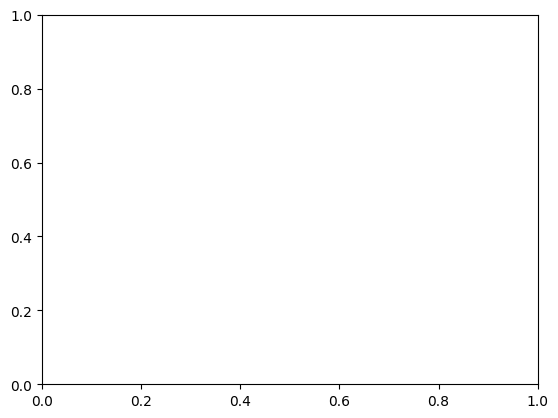

In [23]:
# Outlier Graph

data ={ 'Baseline s = 0 m':    [0.502452479,	0.505149486,	0.507127292,	0.498766569,	0.496968564,	0.498137267,	0.497777666,	0.493552354,	0.500564574,	0.500564574],
        'Lineare Regression s = 0 m':    [10.30346727,	10.51931777,	9.40590321,	9.595772531,	9.524481635,	9.495353955,	9.360953086,	9.349355955,	9.43521069,	9.399610193],
        'MLP Regressor s = 0 m':    [6.241864028,	6.562448307,	6.229637594,	6.032216652,	6.316481232,	6.197543206,	6.323403551,	6.087954805,	6.258046072,	6.155829492],
        'Auto Sklearn s = 0 m':    [6.570449429,	6.374736592,	6.611174241,	6.428227239,	6.985069367,	6.803201168,	6.707996807,	6.658821372,	6.732090073,	6.632120999],
        ' ': [0, 0, 0, 0, 0, 0, 0, 0, 0, 12],
        'Baseline s = 5 m':    [0.674971052,	0.675780154,	0.685759082,	0.676229656,	0.67416195,	0.675150853,	0.67407205,	0.670835641,	0.67766806,	0.679286264],
        'Lineare Regression s = 5 m':    [7.44895464,	7.724498896,	7.329926713,	7.37622534,	7.40508332,	7.418927958,	7.362830204,	7.339995541,	7.358964493,	7.338916738],
        'MLP Regressor s = 5 m':    [2.920948915,	2.827093058,	2.726404781,	2.719482462,	2.724606776,	2.832127471,	2.838060888,	2.831138569,	2.865390563,	2.867458268],
        'Auto Sklearn s = 5 m':    [3.157206763,	3.21411362,	3.575782312,	3.728972332,	3.820670584,	3.958577562,	4.265227304,	4.42066483,	4.481347497,	4.585631783],
        '5': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Baseline s = 10 m':    [4.585631783,	0.86735758,	0.865379775,	0.876437505,	0.873201096,	0.869335385,	0.868346483,	0.865829276,	0.860525161,	0.871403091],
        'Lineare Regression s = 10 m':    [0.865739376,	3.980063721,	4.113205987,	4.304333911,	4.284286156,	4.367443884,	4.36231957,	4.341013212,	4.377692512,	4.39513316],
        'MLP Regressor s = 10 m':    [4.378861216,	2.475223492,	2.408607409,	2.409596312,	2.434139079,	2.440072496,	2.563145933,	2.500305661,	2.5510094,	2.540311271],
        'Auto Sklearn s = 10 m':    [2.516937206,	2.520083715,	2.555684213,	2.602432341,	2.630391318,	2.716965255,	2.845522608,	2.906744676,	3.042224348,	2.971562754],
        '10': [0, 0, 0, 0, 0, 0, 0, 0, 0, 12],
       'numb':      [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
       }

for noise in range(0, 11, 5):

       if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor s = 0 m': 'g', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}

       elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor s = 5 m': 'g', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}

       elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor s = 10 m': 'g', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}


       for alg in [f'Baseline s = {noise} m', f'Lineare Regression s = {noise} m', f'MLP Regressor s = {noise} m', f'Auto Sklearn s = {noise} m', f' ']:
              plt.plot(data['numb'], data[f"{alg}"], color=colors[alg], label=alg, marker=markers[alg], linestyle='None')

#sns.scatterplot(data=data) #, x='Bekannte Positionen', y='Ausreißer [m]') #, color=colors[], label='Baseline s = 0 m')

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('Bekannte Positionen')
plt.ylabel('Ausreißer [%]')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Outlier.png", bbox_inches='tight', dpi=600)
#plt.show
df_loc = []
plt.cla()

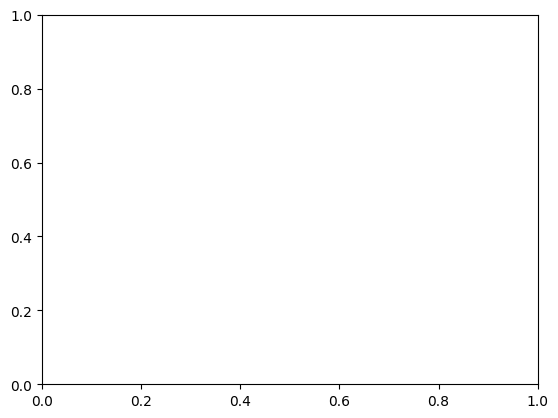

In [ ]:
# Median X_X_X
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        for alg in ['as', 'ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor s = 0 m': 'g', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}

    elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor s = 5 m': 'g', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}

    elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor s = 10 m': 'g', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}


    for alg in alg_def:
        df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0, marker=markers[alg]) #, figsize=(10, 10))

plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzession in [m]')
plt.xlabel('Bekannte Positionen')

plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Median.png", bbox_inches='tight', dpi=600)
df_loc = []
plt.cla()

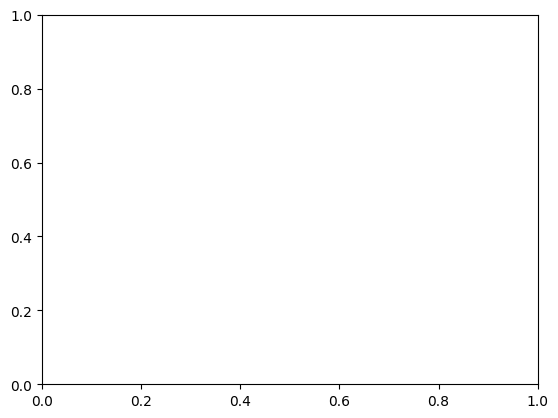

In [ ]:
# Std. Div X_X_X Sea
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df_loc = []
plt.cla()

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"


df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        for alg in ['as', 'ml', 'lr', 'bl']:
        # for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
        # df_loc[f" index"] = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor s = 0 m': 'g', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}

    elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor s = 5 m': 'g', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}

    elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor s = 10 m': 'g', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}

    for alg in alg_def:
        df_tmp = df_loc.filter(regex=f'^{alg}')
        df_tmp.std().plot(style=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        # medians = df_loc.median()
        # std_devs = df_loc.std()

        # df_loc.filter(regex=f'^{alg}').median().plot(style=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        #df_loc.filter(regex=f'^{alg}').plot.errorbar(x=medians.index, y=medians, yerr=std_devs, fmt=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        #median().plot(style=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))



plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzession in [m]')
plt.xlabel('Bekannte Positionen')
plt.ylim(0, 30)

plt.legend(bbox_to_anchor=(1.0, 1.0))

#plt.show()
plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Std_Div.png", bbox_inches='tight', dpi=600)
# df_loc = []
plt.cla()

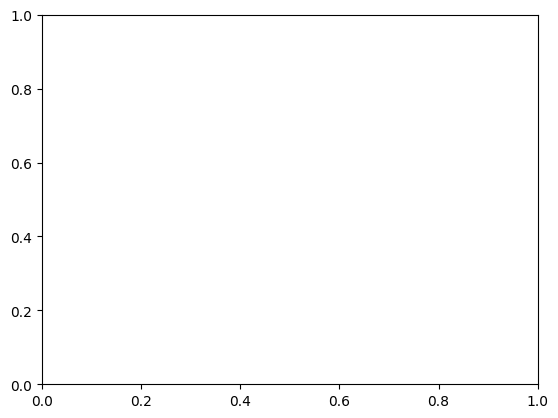

In [ ]:
# Median E X_X_X Sea
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df_loc = []
plt.cla()

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        for alg in ['as', 'ml', 'lr', 'bl']:
        # for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
        # df_loc[f" index"] = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
        alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
        colors = {'Baseline s = 0 m': 'b', 'Lineare Regression s = 0 m': 'r', 'MLP Regressor s = 0 m': 'g', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
        #colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor s = 0 m': 'hotpink', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
        markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}
        offset = {'Baseline s = 0 m': -0.30, 'Lineare Regression s = 0 m': -0.25, 'MLP Regressor s = 0 m': -0.20, 'Auto Sklearn s = 0 m': -0.15, ' ': 0.0}

    elif noise == 5:
        alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor s = 5 m', 'Auto Sklearn s = 5 m', ' ']
        colors = {'Baseline s = 5 m': 'b', 'Lineare Regression s = 5 m': 'r', 'MLP Regressor s = 5 m': 'g', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
        #colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor s = 5 m': 'hotpink', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
        #colors = {'Baseline s = 5 m': 'navy', 'Lineare Regression s = 5 m': 'darkred', 'MLP Regressor s = 5 m': 'deeppink', 'Auto Sklearn s = 5 m': 'darkgoldenrod', ' ': 'w'}
        markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}
        offset = {'Baseline s = 5 m': -0.075, 'Lineare Regression s = 5 m': -0.025, 'MLP Regressor s = 5 m': 0.025, 'Auto Sklearn s = 5 m': 0.075, ' ': 0.0}

    elif noise == 10:
        alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor s = 10 m', 'Auto Sklearn s = 10 m', ' ']
        colors = {'Baseline s = 10 m': 'b', 'Lineare Regression s = 10 m': 'r', 'MLP Regressor s = 10 m': 'g', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
        #colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor s = 10 m': 'hotpink', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
        #colors = {'Baseline s = 10 m': 'royalblue', 'Lineare Regression s = 10 m': 'indianred', 'MLP Regressor s = 10 m': 'pink', 'Auto Sklearn s = 10 m': 'gold', ' ': 'w'}
        markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}
        offset = {'Baseline s = 10 m': 0.15, 'Lineare Regression s = 10 m': 0.20, 'MLP Regressor s = 10 m': 0.25, 'Auto Sklearn s = 10 m': 0.30, ' ': 0.0}

    # colors = {'Baseline': 'b', 'Lineare Regression': 'r', 'MLP Regressor': 'g', 'Auto Sklearn': 'goldenrod', ' ': 'w'}

    for alg in alg_def:
        df_tmp = df_loc.filter(regex=f'^{alg}')

        
        plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5, lw = 0.4)


plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzession in [m]')
plt.xlabel('Bekannte Positionen')

plt.legend(bbox_to_anchor=(1.0, 1.0))

# plt.show()
plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Median_E.png", bbox_inches='tight', dpi=600)
df_loc = []
plt.cla()

      bl_3w0     lr_3w0     ml_3w0     bl_3w5     lr_3w5     ml_3w5  \
0  26.394128  24.253028  16.651340  27.858544  22.582815  16.303150   
1  29.757184   7.056417   7.658877  33.150878  15.799069  19.804639   
2  26.705243   4.495020   4.359024  26.755065   9.731364  12.925182   
3  24.423759   3.344096   4.903927  20.627468   4.169254   7.412577   
4  21.576144   0.518894   4.126247  26.540059   5.730811  12.526975   

     bl_3w10    lr_3w10    ml_3w10     bl_4w0  ...  known_11w5  noise_11w5  \
0  31.943668  21.281615  14.814734  26.394128  ...          11           5   
1  36.503627  22.687746  20.822540  29.757184  ...          11           5   
2  22.238704  10.278788   8.015358  26.705243  ...          11           5   
3  18.128046   4.652786   6.130545  24.423759  ...          11           5   
4  31.327206  18.761921   9.037191  21.576144  ...          11           5   

   known_11w10  noise_11w10  known_12w0  noise_12w0  known_12w5  noise_12w5  \
0           11           

C:\Users\Sese\AppData\Local\Temp\ipykernel_26292\3237952807.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))


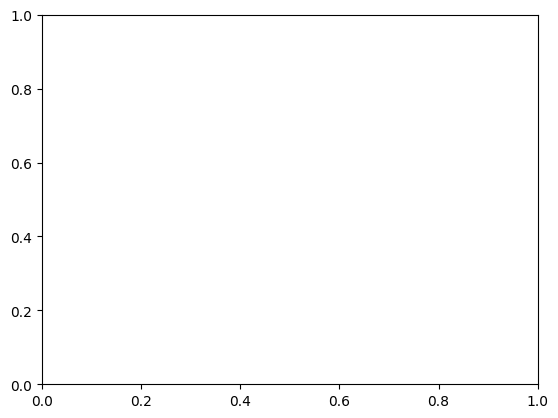

In [ ]:
# Box X_X_X
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

folderinput = "../workdir/AIS-TrainedModel/"

# filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
filename = f"aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        #for alg in ['as', 'ml', 'lr', 'bl']:
        for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)

df_tmp = []
df_tmp = pd.DataFrame()
df_loc1 = pd.DataFrame()
# print(df_res.head(5))
df_loc = df_res.copy() 
#df_loc = df_loc.filter(items=[f'bl_3w', f'lr_3w', f'ml_3w', f'as_3w', f'bl_4w', f'lr_4w', f'ml_4w', f'as_4w', f'bl_5w', f'lr_5w', f'ml_5w', f'as_5w', f'bl_6w', f'lr_6w', f'ml_6w', f'as_6w', f'bl_7w', f'lr_7w', f'ml_7w', f'as_7w', f'bl_8w', f'lr_8w', f'ml_8w', f'as_8w', f'bl_9w', f'lr_9w', f'ml_9w', f'as_9w', f'bl_10w', f'lr_10w', f'ml_10w', f'as_10w', f'bl_11w', f'lr_11w', f'ml_11w', f'as_11w', f'bl_12w', f'lr_12w', f'ml_12w', f'as_12w'])
print(df_loc.head(5))
for noise in range(0, 11, 5):
      
    #df_loc = df_loc.filter(regex=f"w{noise}")
    df_loc1 = df_loc.filter(items=[f'bl_3w{noise}', f'lr_3w{noise}', f'ml_3w{noise}', f'as_3w{noise}', f'bl_4w{noise}', f'lr_4w{noise}', f'ml_4w{noise}', f'as_4w{noise}', f'bl_5w{noise}', f'lr_5w{noise}', f'ml_5w{noise}', f'as_5w{noise}', f'bl_6w{noise}', f'lr_6w{noise}', f'ml_6w{noise}', f'as_6w{noise}', f'bl_7w{noise}', f'lr_7w{noise}', f'ml_7w{noise}', f'as_7w{noise}', f'bl_8w{noise}', f'lr_8w{noise}', f'ml_8w{noise}', f'as_8w{noise}', f'bl_9w{noise}', f'lr_9w{noise}', f'ml_9w{noise}', f'as_9w{noise}', f'bl_10w{noise}', f'lr_10w{noise}', f'ml_10w{noise}', f'as_10w{noise}', f'bl_11w{noise}', f'lr_11w{noise}', f'ml_11w{noise}', f'as_11w{noise}', f'bl_12w{noise}', f'lr_12w{noise}', f'ml_12w{noise}', f'as_12w{noise}'])
    
    for known in range(3, 13, 1):
        df_loc1 = df_loc1.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc1 = df_loc1.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc1 = df_loc1.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor s = {noise} m {known}"})
        df_loc1 = df_loc1.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})

    # df_tmp = df_tmp + df_loc
    df_tmp = df_tmp.assign(**df_loc1)

    # print(df_tmp.head(5))
    # sns.boxplot(data=df_loc1, showfliers=False)
    # plt.grid()
    # plt.ylabel('Präzession in [m]')
    # plt.xlabel('Bekannte Positionen')
    # plt.xticks(rotation=90)
    # plt.legend(bbox_to_anchor=(1.0, 1.0))

    # plt.savefig(f"{folderoutput}{filename}_test_X_X_{noise}_Box.png", bbox_inches='tight', dpi=600)
    # df_loc1 = []
    # plt.cla()
    
    

#         df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
#         if known == 3:
#             df_loc[f" {known}"] = df_loc[f" {known}"] * 0

#     if noise == 0:
#         # alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
#         alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor s = 0 m']
#         colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor s = 0 m': 'hotpink', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}

#     elif noise == 5:
#         #  alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor s = 5 m', 'Auto Sklearn s = 5 m', ' ']
#          alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor s = 5 m']
#          colors = {'Baseline s = 5 m': 'navy', 'Lineare Regression s = 5 m': 'darkred', 'MLP Regressor s = 5 m': 'deeppink', 'Auto Sklearn s = 5 m': 'darkgoldenrod', ' ': 'w'}

#     elif noise == 10:
#         # alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor s = 10 m', 'Auto Sklearn s = 10 m', ' ']
#         alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor s = 10 m']
#         colors = {'Baseline s = 10 m': 'royalblue', 'Lineare Regression s = 10 m': 'indianred', 'MLP Regressor s = 10 m': 'pink', 'Auto Sklearn s = 10 m': 'gold', ' ': 'w'}

#     for alg in alg_def:
#         df_loc.filter(regex=f'^{alg}').boxplot(showfliers=False).plot(style='o', color=colors[alg], label=alg) #, figsize=(10, 10))

# print(df_tmp.head(5))
sns.boxplot(data=df_tmp, showfliers=False)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzession in [m]')
plt.xlabel('Bekannte Positionen')
plt.xticks(rotation=90, fontsize =4)
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Box.png", bbox_inches='tight', dpi=600)
df_loc = []
plt.cla()

In [ ]:
# Number of outliers

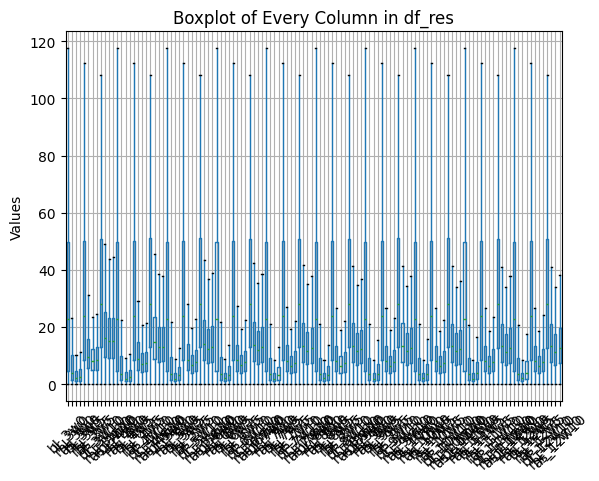

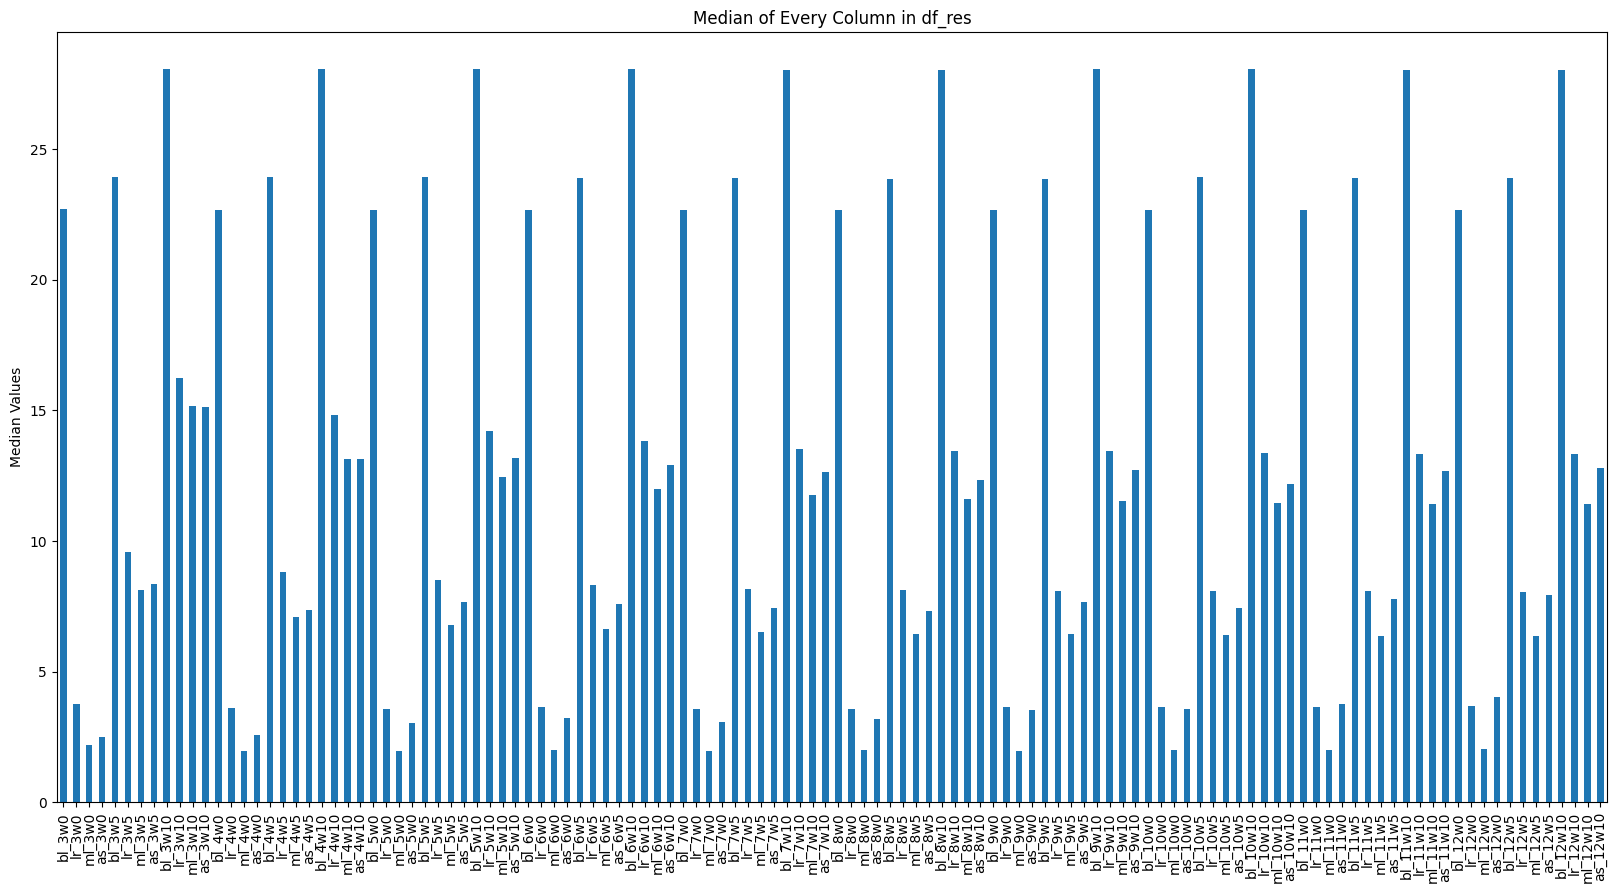

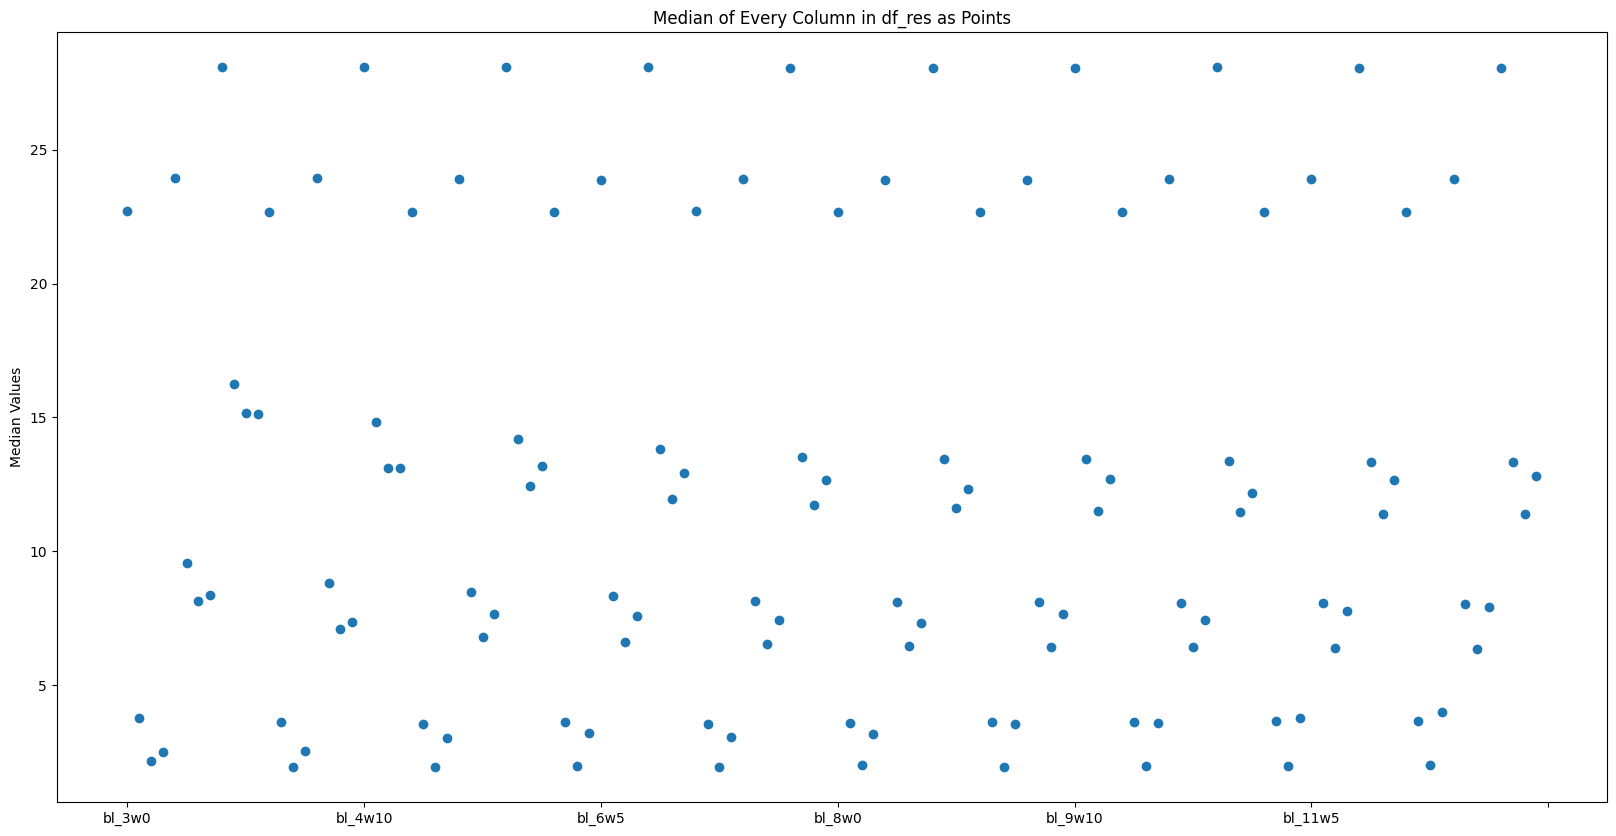

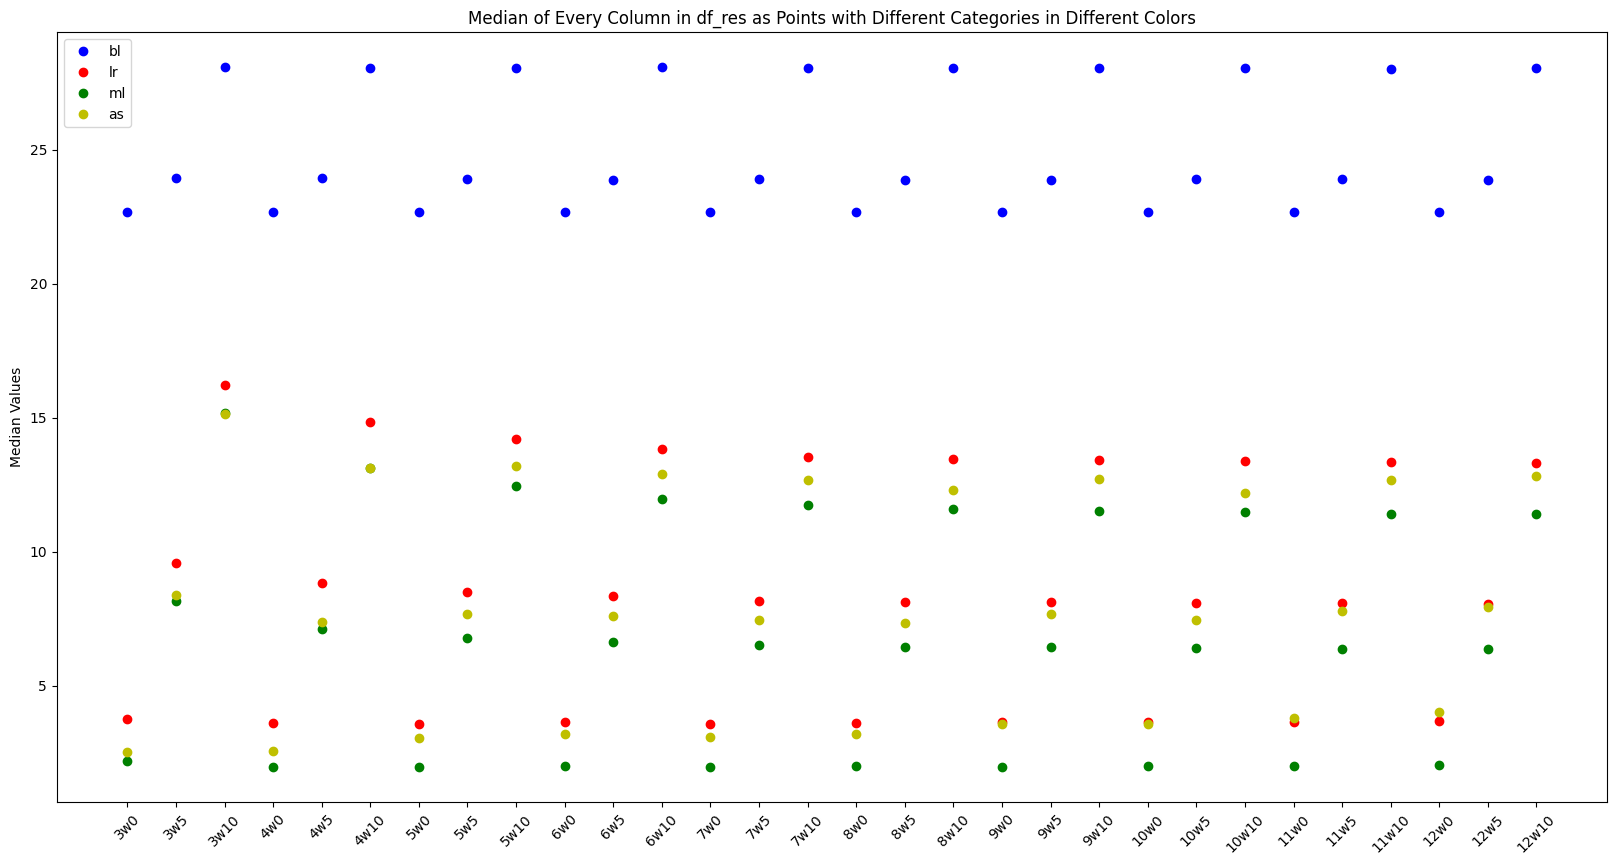

In [20]:
df_res.boxplot(rot=45, showfliers=False, figsize=(20, 10))
plt.ylabel('Values')
plt.title('Boxplot of Every Column in df_res')
plt.show()
df_res.median().plot(kind='bar', figsize=(20, 10))
plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res')
plt.show()
df_res.median().plot(style='o', figsize=(20, 10))
plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res as Points')
plt.show()
colors = {'bl': 'b', 'lr': 'r', 'ml': 'g', 'as': 'y'}

for alg in ['bl', 'lr', 'ml', 'as']:
    df_res.filter(regex=f'^{alg}_').median().plot(style='o', color=colors[alg], label=alg, figsize=(20, 10))

plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res as Points with Different Categories in Different Colors')
plt.legend()

# Set xticks without "as_"
xticks_labels = [col.replace('as_', '') for col in df_res.columns if col.startswith('as_')]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)

plt.show()

In [ ]:
# Calculate the medians of the columns
medians = df_res.median()

# Plot the medians
medians.plot(kind='bar', figsize=(20, 10))

# Rename the x-axis metric
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Median Values')

# Set the title of the plot
plt.title('Median of Every Column in df_res')

# Show the plot
plt.show()
# Add a slight wiggle to the x-axis positions to avoid overlap
x_positions = range(len(medians))
wiggle = 0.1 * (np.random.rand(len(medians)) - 0.5)

# Plot the medians with wiggle
plt.bar(x_positions + wiggle, medians, align='center')

# Rename the x-axis metric
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Median Values')

# Set the title of the plot
plt.title('Median of Every Column in df_res')

# Show the plot
plt.show()

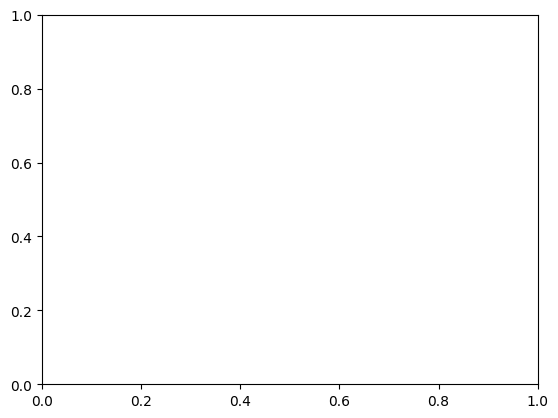

In [ ]:
# Time

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

filename = "aisdk-2023-11-08_1_knn"


folderoutput = f"../workdir/AIS-Images/{filename}_result_18000_10240/"

filename = filename + '_time2_18000_10240'

data =  pd.read_csv(f"../workdir/AIS-TrainedModel/{filename}.csv")
data.head()
other_x_values = data['pos']
laBel = {'in': 'Initialisierung', 'lr': 'Lineare Regression', 'ml': 'MLP Regressor', 'as': 'Auto Sklearn'}

for alg in ['in', 'ml', 'as', 'lr']: 
    other_y_values = data[f'{alg}']
    
    # plt.grid()
    markers = {'in': 'x', 'lr': 'v', 'ml': 's', 'as': 'p'}
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.scatter(other_x_values, other_y_values, label=laBel[alg], marker=markers[alg])
    # plt(label=alg)
    
    #plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.legend(loc = 'best')
    plt.ylabel('Zeit [Std]')
    plt.xlabel('Positionen')
    
#plt.show
plt.savefig(f"{folderoutput}{filename}_time.png", bbox_inches='tight', dpi=600)
plt.cla()

In [ ]:
# Modell Hyperparameter
import numpy as np
import pandas as pd
import pickle
from pathlib import Path


folder = "../workdir/AIS-ModelFrames/"
filename = "aisdk-2023-11-08-xs_3_knn"
# filename = f"aisdk-2023-11-08_1_knn"
# folderoutput = f"../workdir/AIS-Images/{filename}_result_18000_10240/"
folderoutput = f"../workdir/AIS-Images/{filename}_result/"
path = Path(f"{folderoutput}{filename}_hyper.csv")

res = pd.DataFrame()

model = "mlp"
# model = "autosk"

for known in range(3, 13, 1):

    # modelframe = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_{model}_{known}_0_18000_10240.csv", 'rb'))
    modelframe = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_{model}_{known}_0.csv", 'rb'))
    tmp = modelframe.get_params()
    res[known] = tmp

print(res)

# res.to_csv(path, index=False)

                                                                               3   \
memory                                                                       None   
steps                           [(scaler, StandardScaler()), (regressor, MLPRe...   
verbose                                                                     False   
scaler                                                           StandardScaler()   
regressor                                     MLPRegressor(hidden_layer_sizes=50)   
scaler__copy                                                                 True   
scaler__with_mean                                                            True   
scaler__with_std                                                             True   
regressor__activation                                                        relu   
regressor__alpha                                                           0.0001   
regressor__batch_size                                            